In [ ]:
#%%

import pandas as pd
import os
import numpy as np

current_dir = os.path.dirname(os.path.abspath(__file__))
file_name = "product_responses_recoded.csv"
file_path = os.path.join(current_dir, file_name)
df = pd.read_csv(file_path)

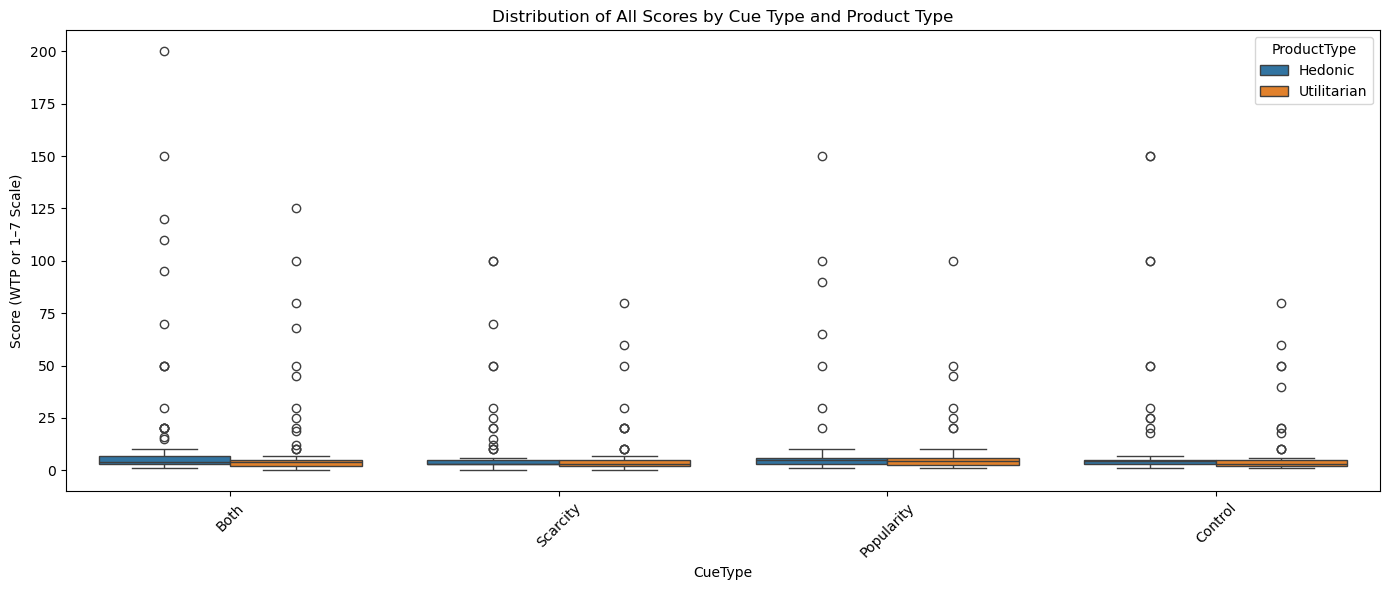

<ipython-input-13-79b254a1422e>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


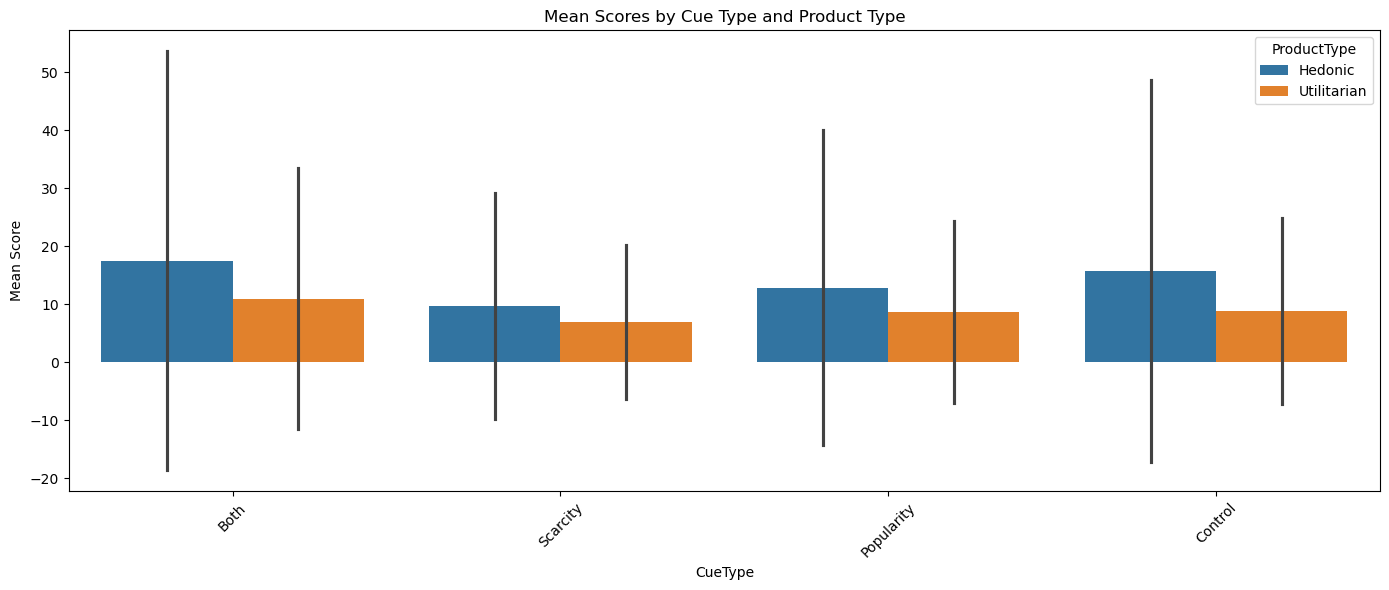

wtp_summary
                            OLS Regression Results                            
Dep. Variable:             Response_1   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.158
Date:                Fri, 16 May 2025   Prob (F-statistic):             0.0426
Time:                        11:05:45   Log-Likelihood:                -644.92
No. Observations:                 128   AIC:                             1306.
Df Residuals:                     120   BIC:                             1329.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

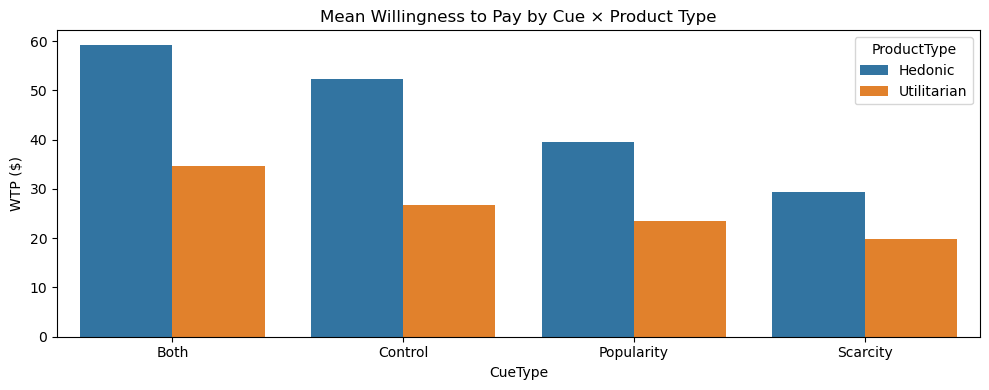

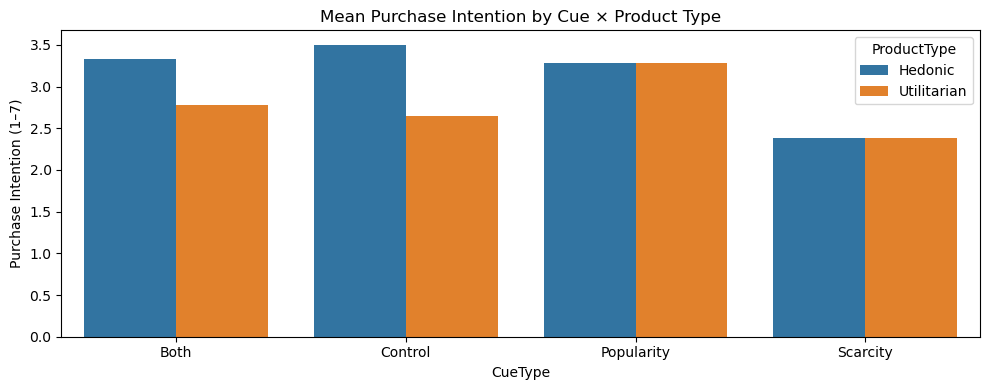

('                            OLS Regression Results                            \n==============================================================================\nDep. Variable:             Response_1   R-squared:                       0.112\nModel:                            OLS   Adj. R-squared:                  0.060\nMethod:                 Least Squares   F-statistic:                     2.158\nDate:                Fri, 16 May 2025   Prob (F-statistic):             0.0426\nTime:                        11:05:45   Log-Likelihood:                -644.92\nNo. Observations:                 128   AIC:                             1306.\nDf Residuals:                     120   BIC:                             1329.\nDf Model:                           7                                         \nCovariance Type:            nonrobust                                         \n====================================================================================================================\n

In [ ]:
#%%

# 1. EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

def extract_product_features(product):
    product = product.lower()
    if "scarcity" in product:
        cue = "Scarcity"
    elif "popularity" in product:
        cue = "Popularity"
    elif "both" in product:
        cue = "Both"
    else:
        cue = "Control"

    if "hed" in product:
        product_type = "Hedonic"
    elif "uti" in product:
        product_type = "Utilitarian"
    else:
        product_type = "Unknown"

    return pd.Series([cue, product_type])

df[['CueType', 'ProductType']] = df['Product'].apply(extract_product_features)

# 1.1 Visualizations 
melted_df = pd.melt(
    df,
    id_vars=['CueType', 'ProductType'],
    value_vars=['Response_1', 'Response_2_recoded', 'Response_3_recoded', 'Response_4_recoded'],
    var_name='Measure',
    value_name='Score'
)

# Boxplot of scores by cue/product
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x='CueType', y='Score', hue='ProductType')
plt.title('Distribution of All Scores by Cue Type and Product Type')
plt.ylabel('Score (WTP or 1–7 Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Barplot of mean ± SD
plt.figure(figsize=(14, 6))
sns.barplot(
    data=melted_df,
    x='CueType',
    y='Score',
    hue='ProductType',
    ci='sd',
    estimator=np.mean
)
plt.title('Mean Scores by Cue Type and Product Type')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2. ANALYSIS: linear model for PI and WTP

# Analysis 1: WTP ~ CueType * ProductType
model_wtp = smf.ols('Response_1 ~ CueType * ProductType', data=df).fit()
# Analysis 2: PI ~ CueType * ProductType
model_pi = smf.ols('Response_2_recoded ~ CueType * ProductType', data=df).fit()

wtp_summary = model_wtp.summary()
pi_summary = model_pi.summary()

print("wtp_summary")
print(wtp_summary)
print("pi_summary")
print(pi_summary)

# Prepare means for plotting
means = df.groupby(['CueType', 'ProductType'])[['Response_1', 'Response_2_recoded']].mean().reset_index()

# Plot mean WTP
plt.figure(figsize=(10, 4))
sns.barplot(data=means, x='CueType', y='Response_1', hue='ProductType')
plt.title('Mean Willingness to Pay by Cue × Product Type')
plt.ylabel('WTP ($)')
plt.tight_layout()
plt.show()

# Plot mean PI
plt.figure(figsize=(10, 4))
sns.barplot(data=means, x='CueType', y='Response_2_recoded', hue='ProductType')
plt.title('Mean Purchase Intention by Cue × Product Type')
plt.ylabel('Purchase Intention (1–7)')
plt.tight_layout()
plt.show()

(wtp_summary.as_text(), pi_summary.as_text())